<a href="https://colab.research.google.com/github/foydalideveloper/Vehicle-Detection/blob/main/vehicle_plate_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
#1. Read in Image, Grayscale and Blur

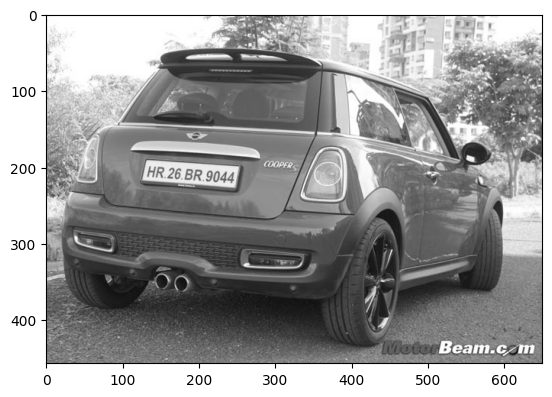

In [11]:
img = cv2.imread('sample_data/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
#2. Apply filter and find edges for localization


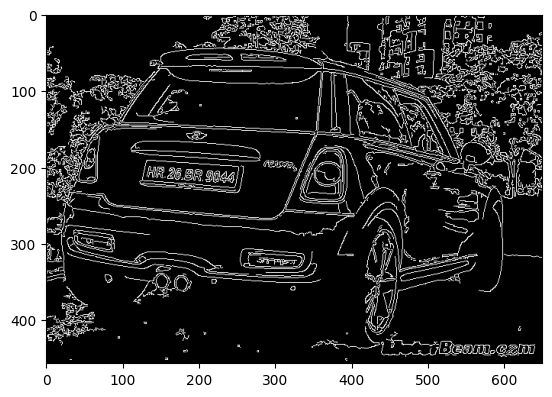

In [12]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
#3. Find Contours and Apply Mask

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [14]:
location = None
for contour in contours:
    epsilon = 0.018 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [15]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

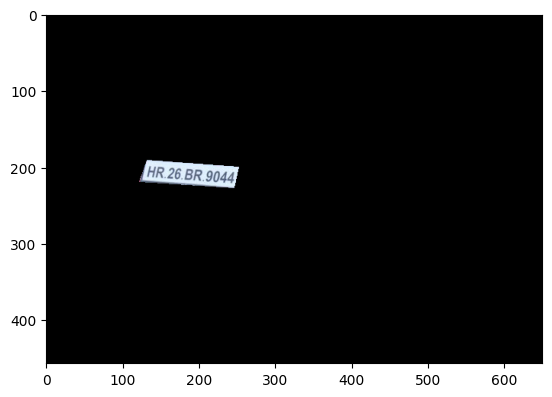

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

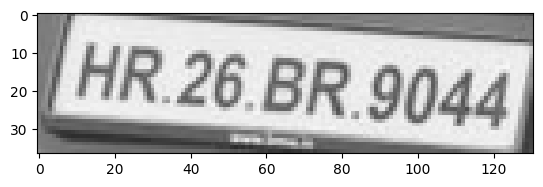

In [18]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
#4.Easy OCR To Read Text

In [19]:
# EasyOCR read
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

# Extract only the text parts
for detection in result:
    box, text, confidence = detection
    print(f" Text: {text},  Confidence: {confidence:.2f}")

 Text: HR.26 BR.9044,  Confidence: 0.57


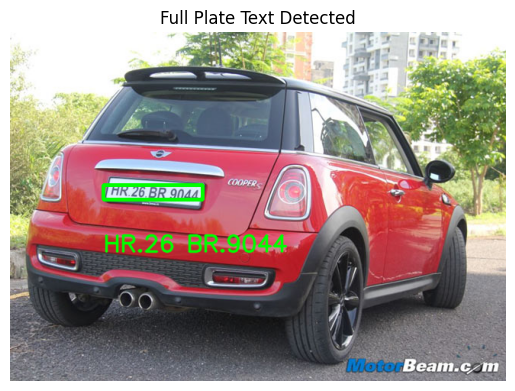

In [20]:
full_text = " ".join([text for (_, text, conf) in result if conf > 0.4])

# Draw combined text on image
font = cv2.FONT_HERSHEY_SIMPLEX
x = approx[0][0][0]
y = approx[1][0][1] + 60

res = cv2.putText(img, text=full_text, org=(x, y),
                  fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# Draw box around plate
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Show final result
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Full Plate Text Detected")
plt.axis("off")
plt.show()

In [ ]:
#Batch License Plate Detection


 Processing: image4.jpg
 Detected Text: MH13 BN8454


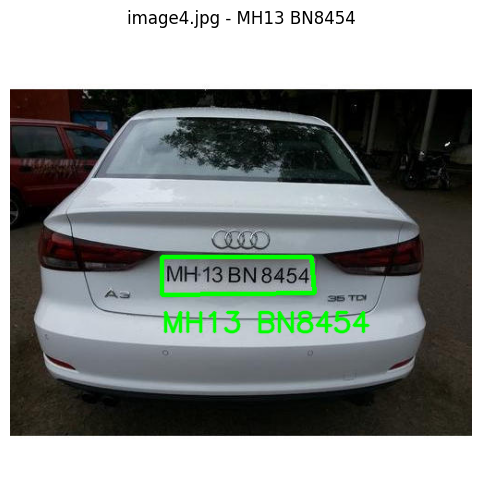


 Processing: image1.jpg
 Detected Text: HR.26 BR.9044


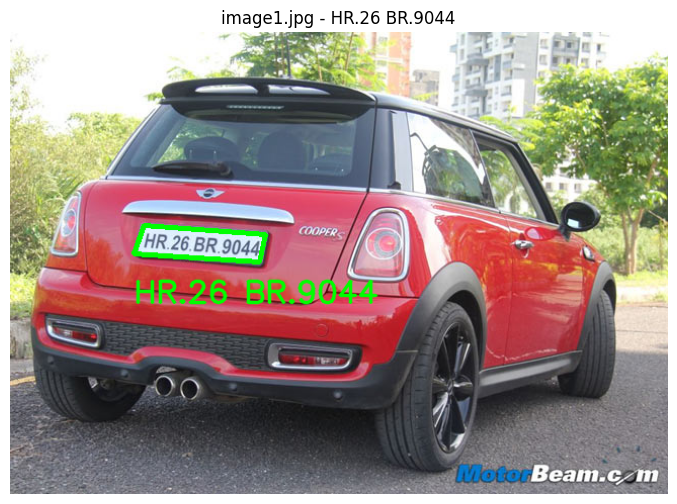

In [21]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

# Create folders to save results
os.makedirs("results", exist_ok=True)
os.makedirs("plates", exist_ok=True)

# Load OCR reader
reader = easyocr.Reader(['en'])

# Input image folder
image_folder = "sample_data"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

for file in image_files:
    print(f"\n Processing: {file}")
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    original = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Preprocessing
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Contour detection
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.018 * cv2.arcLength(contour, True), True)
        if len(approx) == 4:
            location = approx
            break

    if location is not None:
        # Mask and crop
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))
        cropped_image = gray[topx:bottomx+1, topy:bottomy+1]

        # OCR
        result = reader.readtext(cropped_image)
        full_text = " ".join([text for (_, text, conf) in result if conf > 0.4])

        print(f" Detected Text: {full_text}")

        # Annotate image
        if full_text:
            font = cv2.FONT_HERSHEY_SIMPLEX
            x = location[0][0][0]
            y = location[1][0][1] + 40
            img = cv2.putText(img, full_text, (x, y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
            img = cv2.polylines(img, [location], True, (0, 255, 0), 3)

            # Save results
            cv2.imwrite(f"plates/{file}_plate.jpg", cropped_image)
            cv2.imwrite(f"results/{file}_annotated.jpg", img)

            #  Show annotated image
            plt.figure(figsize=(10, 6))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"{file} - {full_text}")
            plt.axis("off")
            plt.show()

        else:
            print(" OCR could not read text.")

    else:
        print(" License plate not found.")
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title(f"{file} - Plate Not Found")
        plt.axis("off")
        plt.show()


In [ ]:
#Auto-Cropping & Saving Plates (One Image)

 Plate saved to: plates/car1_plate.jpg


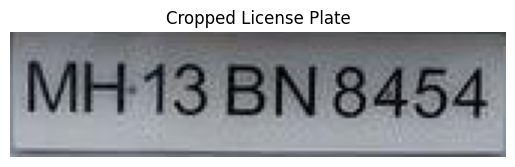

In [22]:
import cv2
import numpy as np
import imutils
import os

# Create output folder
os.makedirs("plates", exist_ok=True)

# Load image
img = cv2.imread("sample_data/image4.jpg")  # change to your file path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)

# Contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.018 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:
        location = approx
        break

if location is not None:
    # Create a mask for the plate area
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)

    # Apply mask to original image
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Get coordinates of plate
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))

    # Crop the plate region
    cropped_plate = img[topx:bottomx+1, topy:bottomy+1]

    # Save it
    save_path = "plates/car1_plate.jpg"
    cv2.imwrite(save_path, cropped_plate)

    print(f" Plate saved to: {save_path}")

    # Optional: Show cropped plate
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
    plt.title("Cropped License Plate")
    plt.axis("off")
    plt.show()
else:
    print(" Plate not found.")



 Processing: image4.jpg
 Plate saved as image4_plate.jpg


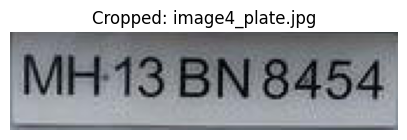


 Processing: image1.jpg
 Plate saved as image1_plate.jpg


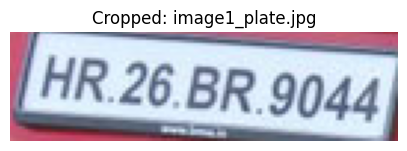

In [23]:
import cv2
import os
import numpy as np
import imutils
import matplotlib.pyplot as plt

# Create folder to save cropped plates
os.makedirs("plates", exist_ok=True)

# Folder with car images
image_folder = "sample_data"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png'))]

for file in image_files:
    print(f"\n Processing: {file}")
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    if img is None:
        print(" Could not load image:", file)
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step 1: Preprocessing
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Step 2: Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.018 * cv2.arcLength(contour, True), True)
        if len(approx) == 4:
            location = approx
            break

    if location is not None:
        # Step 3: Mask + crop plate
        mask = np.zeros(gray.shape, np.uint8)
        cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))

        cropped_plate = img[topx:bottomx+1, topy:bottomy+1]

        # Step 4: Save cropped plate
        plate_filename = f"{os.path.splitext(file)[0]}_plate.jpg"
        save_path = os.path.join("plates", plate_filename)
        cv2.imwrite(save_path, cropped_plate)
        print(f" Plate saved as {plate_filename}")

        # Step 5 (Optional): Show the cropped plate
        plt.figure(figsize=(5, 3))
        plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped: {plate_filename}")
        plt.axis("off")
        plt.show()

    else:
        print(" Plate not found.")


In [6]:
!pip install pytesseract


 Reading plate: image4.jpg
 Detected: MH13 BN8454 (0.93)


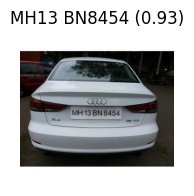


 Reading plate: image1.jpg
 Detected: HR.26 BR.9044 (0.79)


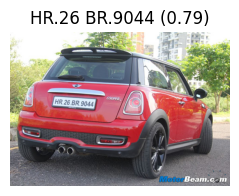


 All results saved to plate_texts.csv


In [24]:
import cv2
import os
import pandas as pd
import easyocr
import matplotlib.pyplot as plt

# Folder where cropped plates are saved
plate_folder = "sample_data"
output_csv = "plate_texts.csv"

# Load EasyOCR reader
reader = easyocr.Reader(['en'])

# Prepare result list
results = []

# Get all plate image files
plate_files = [f for f in os.listdir(plate_folder) if f.lower().endswith(('.jpg', '.png'))]

for file in plate_files:
    print(f"\n Reading plate: {file}")
    img_path = os.path.join(plate_folder, file)
    img = cv2.imread(img_path)

    if img is None:
        print(" Could not read image:", file)
        results.append([file, "Image Load Failed", 0.0])
        continue

    # Optional: Resize small plates for better OCR
    if img.shape[0] < 60 or img.shape[1] < 150:
        img = cv2.resize(img, (300, 80), interpolation=cv2.INTER_CUBIC)

    # Run OCR
    result = reader.readtext(img)

    if result:
        # Select best result based on longest + high confidence
        best = max(result, key=lambda x: (len(x[1]), x[2]))
        plate_text = best[1]
        confidence = best[2]

        if confidence < 0.5:
            print(" Low confidence result skipped.")
            results.append([file, "Low Confidence", round(confidence, 2)])
        else:
            print(f" Detected: {plate_text} ({confidence:.2f})")
            results.append([file, plate_text, round(confidence, 2)])

            # Optional: Show good result
            plt.figure(figsize=(4, 2))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"{plate_text} ({confidence:.2f})")
            plt.axis("off")
            plt.show()

    else:
        print(" No text found.")
        results.append([file, "Plate Not Found", 0.0])

# Save to CSV
df = pd.DataFrame(results, columns=["Image Name", "Plate Text", "Confidence"])
df.to_csv(output_csv, index=False)
print(f"\n All results saved to {output_csv}")


In [25]:
import cv2
import os
import pandas as pd
import easyocr
import pytesseract
import matplotlib.pyplot as plt

# Folder where cropped plates are saved
plate_folder = "sample_data"
output_csv = "plate_texts.csv"

# Load EasyOCR reader
reader = easyocr.Reader(['en'])

# Prepare result list
results = []

# Get all plate image files
plate_files = [f for f in os.listdir(plate_folder) if f.lower().endswith(('.jpg', '.png'))]

for file in plate_files:
    print(f"\n Reading plate: {file}")
    img_path = os.path.join(plate_folder, file)
    img = cv2.imread(img_path)

    if img is None:
        print(" Could not read image:", file)
        results.append([file, "Image Load Failed", "None", 0.0])
        continue

    # Optional: Resize small plates
    if img.shape[0] < 60 or img.shape[1] < 150:
        img = cv2.resize(img, (300, 80), interpolation=cv2.INTER_CUBIC)

    # Run EasyOCR
    result = reader.readtext(img)

    if result:
        best = max(result, key=lambda x: (len(x[1]), x[2]))
        plate_text = best[1]
        confidence = best[2]

        if confidence >= 0.5:
            print(f" EasyOCR: {plate_text} ({confidence:.2f})")
            results.append([file, plate_text, "EasyOCR", round(confidence, 2)])
            continue
        else:
            print(" EasyOCR low confidence. Falling back to Tesseract.")

    else:
        print(" EasyOCR found no text. Trying Tesseract...")

    # Tesseract fallback
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tesseract_text = pytesseract.image_to_string(gray, config='--psm 7').strip()
    if len(tesseract_text) < 4 or not any(char.isdigit() for char in tesseract_text):
         print(" Tesseract output is too short or lacks digits.")
         results.append([file, "Tesseract Output Unreliable", "Tesseract", 0.3])

    if tesseract_text:
        print(f" Tesseract: {tesseract_text}")
        results.append([file, tesseract_text, "Tesseract", 0.5])  # fallback confidence defaulted to 0.5
    else:
        print(" Tesseract also failed.")
        results.append([file, "Plate Not Found", "None", 0.0])

# Save results to CSV
df = pd.DataFrame(results, columns=["Image Name", "Plate Text", "Source", "Confidence"])
df.to_csv(output_csv, index=False)
print(f"\n All results saved to {output_csv}")



 Reading plate: image4.jpg
 EasyOCR: MH13 BN8454 (0.93)

 Reading plate: image1.jpg
 EasyOCR: HR.26 BR.9044 (0.79)

 All results saved to plate_texts.csv


In [26]:
import pandas as pd
df=pd.read_csv('plate_texts.csv')
df

,Image Name,Plate Text,Source,Confidence
0,image4.jpg,MH13 BN8454,EasyOCR,0.93
1,image1.jpg,HR.26 BR.9044,EasyOCR,0.79



 Processing image2.jpg
 Plate saved: image2_plate_0.jpg


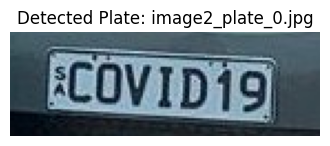


 Processing image9.jpg
 Plate saved: image9_plate_0.jpg


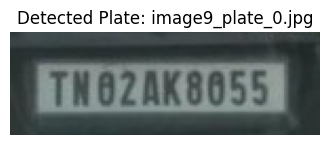


 Processing image10.jpg
 Plate saved: image10_plate_0.jpg


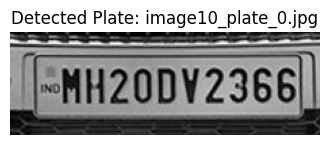


 Processing image4.jpg
 Plate saved: image4_plate_0.jpg


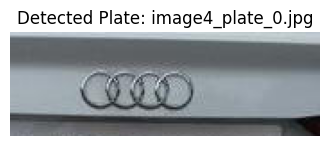

 Plate saved: image4_plate_1.jpg


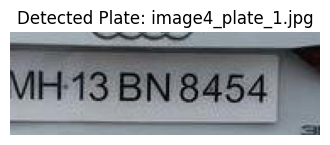


 Processing image1.jpg
 Plate saved: image1_plate_0.jpg


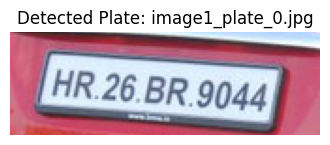

 Plate saved: image1_plate_1.jpg


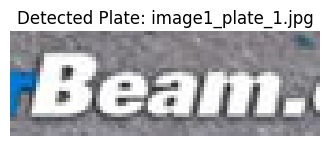

In [30]:
import cv2
import os
import matplotlib.pyplot as plt

# Load Haar Cascade for plate detection
plate_cascade = cv2.CascadeClassifier('haar.xml')

# Folder with test car images
image_folder = "sample_data"
output_folder = "plates_haar"
os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png'))]

for file in image_files:
    print(f"\n Processing {file}")
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    if img is None:
        print(" Failed to load image.")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect license plates
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(60, 20))

    if len(plates) == 0:
        print(" No plate found")
        continue

    for i, (x, y, w, h) in enumerate(plates):
        plate_img = img[y:y+h, x:x+w]
        plate_filename = f"{os.path.splitext(file)[0]}_plate_{i}.jpg"
        save_path = os.path.join(output_folder, plate_filename)
        cv2.imwrite(save_path, plate_img)
        print(f" Plate saved: {plate_filename}")

        # Optional: Display result
        plt.figure(figsize=(4, 2))
        plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Plate: {plate_filename}")
        plt.axis("off")
        plt.show()


In [12]:
!pip install -U yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4f0c777a50c8e01f6fd5432e207cad12607d96cd3fd4d58217aa228de4cc7e56
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opencv-python
    F

In [15]:
import yolov5
import cv2
import os
import matplotlib.pyplot as plt

# Load the license plate YOLOv5 model from Hugging Face
model = yolov5.load('keremberke/yolov5m-license-plate')

# Optional: adjust detection thresholds
model.conf = 0.25  # confidence threshold
model.iou = 0.45   # IoU threshold for NMS

# Prepare test folder
os.makedirs('lp_preds', exist_ok=True)

# Assuming you uploaded images in Colab:
from google.colab import files
uploaded = files.upload()  # upload your .jpg images

# Run detection and crop plates
for fname in uploaded.keys():
    img = cv2.imread(fname)
    results = model(img)

    # Save annotated image
    results.save(save_dir='lp_preds')

    # Crop and show each detected plate
    boxes = results.pred[0]
    for i, (x1, y1, x2, y2, conf, cls) in enumerate(boxes.cpu().numpy()):
        if conf < model.conf:
            continue
        crop = img[int(y1):int(y2), int(x1):int(x2)]
        cv2.imwrite(f'lp_preds/{fname.split(".")[0]}_plate_{i}.jpg', crop)
        plt.figure(figsize=(4,2))
        plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
        plt.title(f'Plate-{i} from {fname} (conf={conf:.2f})')
        plt.axis('off')
        plt.show()


Saving image;s=768x1020.webp to image;s=768x1020.webp


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Saved 1 image to lp_preds3
